In [54]:
# build graph pool with the following structure 
# graph_pool = {'graphs': {gid: { 
#                          'nodes': {nodeid: 'label'},
#                          'edges': [{'source': -1, 'target': -1}]}}}
import pandas as pd
import json
import os
import sys
import glob

In [62]:
base_dir = '/home/maniaa/ashes/code/statistics/' 
os.chdir(base_dir)
files = [base_dir + file for file in glob.glob("*.csv")]
    

In [140]:
n_bins = 41
stg_hist = [0]*n_bins
edge_hist = [0]*n_bins

def update_edge_hist(n_edge):
    global edge_hist
    # n_stage in the range 1 to 10 maps to index 0 to 9
    # n_stage in the range 11 to 40 maps to index 10 to 19 
    # n_stage in the range 41 to 100 maps to index 20 to 29
    # n_stage in the range 101 to 200 maps to index 30 to 39
    # n_stage > 201 maps 40
    if n_edge >= 0 and n_edge <= 10:
        edge_hist[n_edge - 2] += 1
        edge_hist[n_edge - 1] += 1
    elif n_edge > 10 and n_edge <= 40:
        edge_hist[10 + (n_edge - 11)//3] += 1
    elif n_edge > 40 and n_edge <= 100:
        edge_hist[20 + (n_edge - 41)//6] += 1
    elif n_edge > 100 and n_edge <= 200:
        edge_hist[30 + (n_edge - 101)//10] += 1
    else:
        edge_hist[40] += 1


def update_stage_his(n_stg):
    global stg_hist
    # n_stage in the range 1 to 10 maps to index 0 to 9
    # n_stage in the range 11 to 40 maps to index 10 to 19 
    # n_stage in the range 41 to 100 maps to index 20 to 29
    # n_stage in the range 101 to 200 maps to index 30 to 39
    # n_stage > 201 maps 40
    if n_stg >= 0 and n_stg <= 10:
        stg_hist[n_stg - 2] += 1
        stg_hist[n_stg - 1] += 1
    elif n_stg > 10 and n_stg <= 40:
        stg_hist[10 + (n_stg - 11)//3] += 1
    elif n_stg > 40 and n_stg <= 100:
        stg_hist[20 + (n_stg - 41)//6] += 1
    elif n_stg > 100 and n_stg <= 200:
        stg_hist[30 + (n_stg - 101)//10] += 1
    else:
        stg_hist[40] += 1

# This function computes the distribution of # edges
def structural_statistics(fpath):
    df = pd.read_csv(fpath)
    df = df[df['state'] == 'SUCCEEDED']

    # build graph pool
    wrf_grps = df.groupby('workflow.id')
    print('# Jobs', len(df), '# of distinct workflows', len(wrf_grps))
    gid = len(graphs_pool)
    graph_pool = {}
    n_stages = []
    n_edges = []
    for index, grp in wrf_grps:
        lbl_vid = {}
        wrk_edges = [e.split('>') for e in grp['workflow.dag'].values[0].split(',')]
        graph = {'nodes': {}, 'edges': [], 'n_stages': 0}
        for e in wrk_edges:
            srclbl = int(e[0].split('-')[1])
            if srclbl not in lbl_vid:
                vid = len(lbl_vid)
                lbl_vid[srclbl] = vid
                graph['nodes'][vid] = srclbl
            if len(e) > 1:
                trgtlbl = int(e[1].split('-')[1])
                if trgtlbl not in lbl_vid:
                    vid = len(lbl_vid);
                    lbl_vid[trgtlbl] = vid
                    graph['nodes'][vid] = trgtlbl
                graph['edges'].append({'source': lbl_vid[srclbl], 'target': lbl_vid[trgtlbl]})
            graph['n_stages'] = len(graph['nodes'])
            n_stages.append(graph['n_stages'])
            n_edges.append(len(graph['edges'])))
            update_stage_his(graph['n_stages'])
            update_edge_hist(len(graph['edges']) + len(graph['nodes']))
        graph_pool[gid] = graph
        gid += 1
    print(fpath, '--> processed')
    return graph_pool, n_stages, n_edges
 
graphs_pool = {}
n_stages = []
n_edges = []
for index, file in enumerate(files):
    gp, ns, ne = structural_statistics(file)
    graphs_pool.update(gp)
    n_stages.extend(ns)
    n_edges.extend(ne)
    

# Jobs 10848 # of distinct workflows 10554
/home/maniaa/ashes/code/statistics/08-29-2018.csv --> processed
# Jobs 13771 # of distinct workflows 13469
/home/maniaa/ashes/code/statistics/08-08-2018.csv --> processed
# Jobs 11927 # of distinct workflows 10875
/home/maniaa/ashes/code/statistics/08-23-2018.csv --> processed
# Jobs 10461 # of distinct workflows 10156
/home/maniaa/ashes/code/statistics/11-14-2018.csv --> processed
# Jobs 29389 # of distinct workflows 29249
/home/maniaa/ashes/code/statistics/11-04-2018.csv --> processed
# Jobs 14631 # of distinct workflows 14480
/home/maniaa/ashes/code/statistics/08-11-2018.csv --> processed
# Jobs 11910 # of distinct workflows 11605
/home/maniaa/ashes/code/statistics/10-16-2018.csv --> processed
# Jobs 16578 # of distinct workflows 13433
/home/maniaa/ashes/code/statistics/09-09-2018.csv --> processed
# Jobs 13862 # of distinct workflows 13661
/home/maniaa/ashes/code/statistics/09-23-2018.csv --> processed
# Jobs 12488 # of distinct workflows 

/home/maniaa/ashes/code/statistics/09-01-2018.csv --> processed
# Jobs 7205 # of distinct workflows 7006
/home/maniaa/ashes/code/statistics/11-08-2018.csv --> processed
# Jobs 21067 # of distinct workflows 20421
/home/maniaa/ashes/code/statistics/11-05-2018.csv --> processed
# Jobs 17521 # of distinct workflows 16858
/home/maniaa/ashes/code/statistics/11-07-2018.csv --> processed
# Jobs 11533 # of distinct workflows 10993
/home/maniaa/ashes/code/statistics/09-11-2018.csv --> processed
# Jobs 12443 # of distinct workflows 12196
/home/maniaa/ashes/code/statistics/10-07-2018.csv --> processed
# Jobs 13725 # of distinct workflows 13204
/home/maniaa/ashes/code/statistics/09-04-2018.csv --> processed
# Jobs 13554 # of distinct workflows 13125
/home/maniaa/ashes/code/statistics/09-25-2018.csv --> processed
# Jobs 13822 # of distinct workflows 13641
/home/maniaa/ashes/code/statistics/09-22-2018.csv --> processed
# Jobs 11323 # of distinct workflows 10797
/home/maniaa/ashes/code/statistics/10-2

In [131]:
print(len(n_edges))

1966261


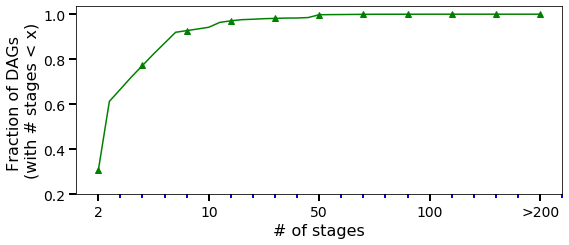

In [134]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def format_xticks(x, pos=None):
    xtickmap = {0: '2', 10: '10', 20: '50', 30: '100', 40: '>200'  }
    return xtickmap[int(x)] if int(x) in xtickmap.keys() else x

# CDF of # of stages
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    print(n)
    y = np.arange(1, n+1) / n
    print(y)
    return(x,y)




n_graphs = sum(stg_hist)
stg_hist2 = [x/n_graphs for x in stg_hist]
cdf = [0]*n_bins
for i, x in enumerate(stg_hist2):
    if i == 0:
        cdf[i] = stg_hist2[i]
        continue
    cdf[i] =  stg_hist2[i] + cdf[i-1]


fig, ax = plt.subplots(figsize=(9, 3))
ax.plot(cdf, color='green', marker='^', markevery=4)
plt.xticks([0, 10, 20, 30, 40], rotation=0)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.yticks(np.arange(0.2, 1.2, 0.2))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='b')
ax.tick_params(labelsize=14)
plt.xlabel('# of stages', fontsize=16)
plt.ylabel('Fraction of DAGs \n(with # stages < x)', fontsize=16)

plt.subplots_adjust(left=0.21, bottom=0.1, right=0.96, top=0.97)
fig.savefig('../fig_graphstruc_nstages.pdf', format='pdf', dpi=200)
fig.savefig('../fig_graphstruc_nstages.png', format='png', dpi=200)
plt.show()


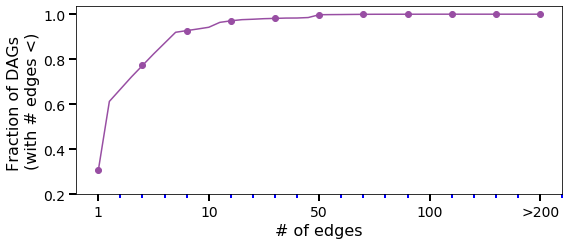

In [138]:
n_graphse = sum(edge_hist)
edge_hist2 = [x/n_graphse for x in edge_hist]
cdf2 = [0]*n_bins
for i, x in enumerate(edge_hist2):
    if i == 0:
        cdf2[i] = edge_hist2[i]
        continue
    cdf2[i] =  edge_hist2[i] + cdf2[i-1]

def format_xticks2(x, pos=None):
    xtickmap = {0: '1', 10: '10', 20: '50', 30: '100', 40: '>200'  }
    return xtickmap[int(x)] if int(x) in xtickmap.keys() else x

fig, ax = plt.subplots(figsize=(9, 3))
ax.plot(cdf, color='#984ea3', marker='o', markevery=4)
plt.xticks([0, 10, 20, 30, 40], rotation=0)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks2))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.yticks(np.arange(0.2, 1.2, 0.2))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='b')
ax.tick_params(labelsize=14)
plt.xlabel('# of edges', fontsize=16)
plt.ylabel('Fraction of DAGs \n(with # edges <)', fontsize=16)

plt.subplots_adjust(left=0.21, bottom=0.1, right=0.96, top=0.97)
fig.savefig('../fig_graphstruc_nedges.pdf', format='pdf', dpi=200)
fig.savefig('../fig_graphstruc_nedges.png', format='png', dpi=200)
plt.show()

In [139]:
print(graphs_pool)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

